In [1]:
import csv 
import os
import numpy as np
import random
from sklearn.metrics import roc_curve
import math
from matplotlib import pyplot
import datetime
from sklearn.metrics import auc, roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from scipy.signal import find_peaks
import plotly.graph_objects as go
from scipy import fft
from scipy import signal as sig
from scipy.stats import multivariate_normal
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from numpy import arange
from math import sqrt
from numpy import argmax
import random as rn
import h2o
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.metrics import precision_recall_curve
sb.set_style(style="whitegrid")
sb.set_color_codes()
import scipy.ndimage
from scipy.fftpack import rfft, irfft, fftfreq, fft, ifft

In [2]:
import h2o
from h2o.estimators import H2OExtendedIsolationForestEstimator
h2o.init()



Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,22 mins 17 secs
H2O_cluster_timezone:,Africa/Cairo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_khattab_ky8yof
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.717 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [3]:
import pandas as pd
scaler = preprocessing.MinMaxScaler()

df2= pd.read_csv("F://phd//download//TTDD-main//TTDD-main//SDWA_PUB_WATER_SYSTEM.csv")
polution=df2.values[:,0:3]



          0           1     2
0      2014  Very Small   480
1      2013  Very Small   480
2      2012  Very Small   480
3      2011  Very Small   480
4      2015       Small  2445
...     ...         ...   ...
99995  2011  Very Small    25
99996  2015       Small   870
99997  2014  Very Small    25
99998  2013  Very Small    25
99999  2012  Very Small    25

[100000 rows x 3 columns]
             0
0     0.001467
1     0.001467
2     0.001467
3     0.007341
4     0.000192
...        ...
9995  0.000190
9996  0.000190
9997  0.000190
9998  0.000190
9999  0.000635

[10000 rows x 1 columns]


Text(0.5, 1.0, 'polution')

<Figure size 1600x800 with 0 Axes>

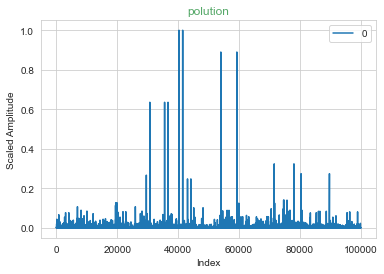

In [4]:


polution = pd.DataFrame(df2) 
#print(Nile)
polution = DataFrame(polution.values[0:100000,0:3])
print(polution)
polutiontest = DataFrame(polution.values[20000:30000,2:3])
polutiontest=DataFrame(scaler.fit_transform(polutiontest))
poltest=polutiontest
print(polutiontest)
pol = DataFrame(polution.values[0:100000,2:3])
pol=DataFrame(scaler.fit_transform(pol)) 
plt.figure(figsize=(20, 10), dpi=80)
pol.plot()
plt.xlabel('Index') 
plt.ylabel('Scaled Amplitude') 
plt.title("polution", color='g')



In [5]:



from h2o.estimators import H2OIsolationForestEstimator
from sklearn.metrics import confusion_matrix
pol = h2o.H2OFrame(pol)

pol=pol.fillna()


predictors = pol.col_names


# Define an Extended Isolation forest model




model = H2OIsolationForestEstimator(sample_rate = 0.1,
                                    max_depth = 20,
                                    ntrees = 50)
model.train(training_frame=pol)
polutiontest = h2o.H2OFrame(polutiontest)


score = model.predict(polutiontest.fillna())
result_pred = score["predict"]

# Predict the leaf node assignment
#anomaly_score = model.predict_leaf_node_assignment(testlevframe, "Path")





Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
isolationforest Model Build progress: |██████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
isolationforest prediction progress: |███████████████████████████████████████████| (done) 100%


In [6]:
rr=polution.values[20000:30000,2:3]
for j in range(0,10000):
 if (polution.values[j+20000,1:2]== 'Very Large' ):
  rr[j] = 1
 else:
  rr[j] =0


dd=h2o.as_list(result_pred)
dds=dd
print(dds)
ff=h2o.as_list(h2o.H2OFrame(rr))

fpr, tpr, thresholds = roc_curve(ff,dd)

print(roc_auc_score(ff,dd))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)


       predict
0     0.180028
1     0.180028
2     0.180028
3     0.336146
4     0.057665
...        ...
9995  0.052039
9996  0.052039
9997  0.052039
9998  0.052039
9999  0.118143

[10000 rows x 1 columns]
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
0.9999283205504981
Threshold value is: 0.8045007032348804


In [7]:
testlevel=pd.DataFrame(ff["C1"],columns=["C1"])
typlevel=pd.DataFrame(dd,columns=["anomaly_score"])
optimal_cond=optimal_threshold

for j in range(len(typlevel)):
 #typlevel[j]["mean_length"] 
 if typlevel["anomaly_score"][j]>=optimal_threshold:
   typlevel["anomaly_score"][j]=1
 else:
   typlevel["anomaly_score"][j]  =0

pp=(np.array(typlevel))

In [8]:
from sklearn.metrics import f1_score
score = f1_score ((typlevel.values[:,0:1]),ff, average='micro')
score2=accuracy_score((typlevel.values[:,0:1]),ff, normalize=True)
score3=accuracy_score((typlevel.values[:,0:1]),ff, normalize=False)
print('F1 Score: %.3f' % score)
print('accuracy_score normalize: %.3f' % score2)
print('accuracy_score not normalize: %.3f' % score3)

F1 Score: 0.997
accuracy_score normalize: 0.997
accuracy_score not normalize: 9965.000


In [9]:
poltest.insert(0, 'id', range(1, 1 + len(ff)))
x=pd.DataFrame((poltest.values[:,0:1]))
y=pd.DataFrame((poltest.values[:,1:2]))
rr=rr.flatten()


[0.18002813 0.18002813 0.18002813 ... 0.05203938 0.05203938 0.11814346] [0 0 0 ... 0 0 0] 0.8045007032348804


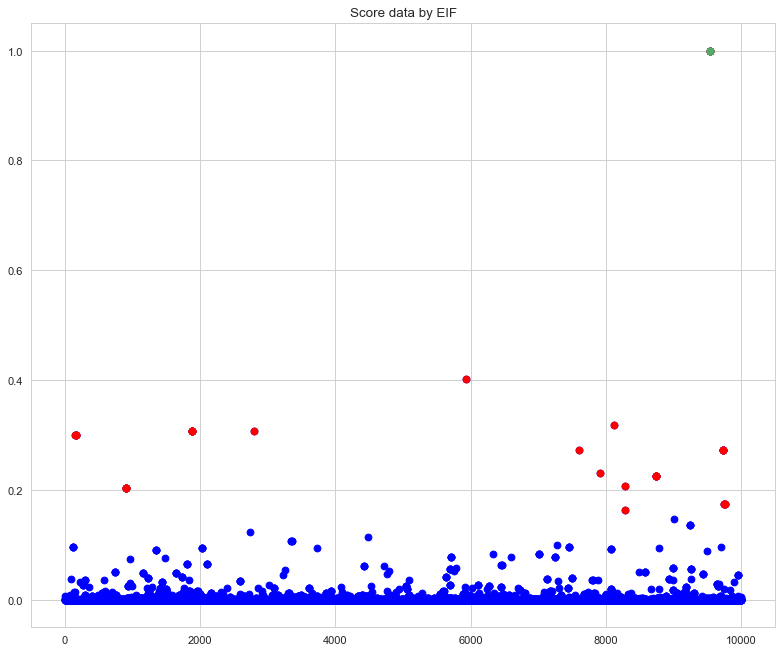

In [10]:
zz=(np.array(dds))
zz=zz.flatten()
print(zz,rr,optimal_threshold)
plt.figure(figsize=(12, 10), dpi=80)
plt.scatter(x,y,color='blue')
plt.scatter(x[rr[:]>=1],y[rr[:]>=1],c='red')
plt.scatter(x[zz[:]>=1],y[zz[:]>=1],c='g')
plt.title('Score data by EIF')
plt.show()
